In [1]:
from pyspark import SparkConf, SparkContext
import collections

In [2]:
conf = SparkConf().setMaster('local').setAppName('RatingsHistogram')
sc = SparkContext(conf=conf)

In [3]:
lines = sc.textFile('ml-100k/u.data')
ratings = lines.map(lambda x: x.split()[2])
result = ratings.countByValue()

In [4]:
sorted_results = collections.OrderedDict(sorted(result.items()))
for key,value in sorted_results.items():
    print(key, value)

1 6110
2 11370
3 27145
4 34174
5 21201


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [11]:
df = pd.read_csv('ml-100k/u.data', sep='\t', names=['userid', 'number', 'rating', 'total'])

In [12]:
df.head()

,userid,number,rating,total
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


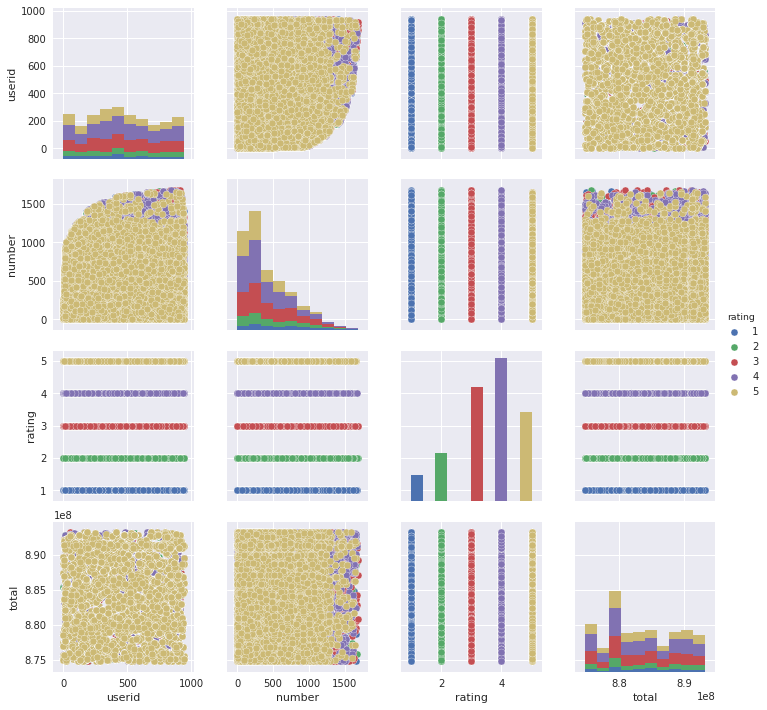

In [18]:
plt.figure(figsize=(9,9))
sns.pairplot(df, hue='rating')

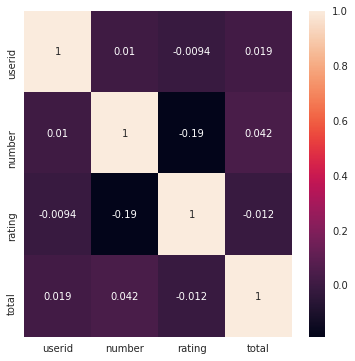

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)